# Admission Prediction

In [1]:
# necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
sns.set(color_codes = True)
sns.set(rc={'figure.figsize':(10,10)})

In [3]:
# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split

# metrics 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# logistic regression
from sklearn.linear_model import LogisticRegression

# knn
from sklearn.neighbors import KNeighborsClassifier

# chi2
from sklearn.feature_selection import SelectKBest, chi2


In [4]:
Adm = pd.read_csv('./kaggle/Admission_Predict.csv')

In [5]:
Adm.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
Adm.drop('Serial No.', axis = 1, inplace = True)

In [7]:
Adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [8]:
Adm.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
Adm.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

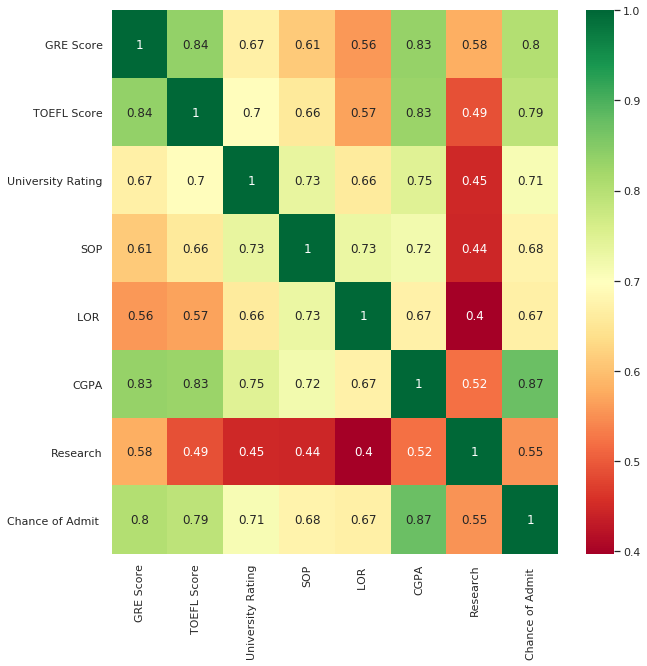

In [10]:
# correlation matrix
Adm_corr = Adm.corr()
ax = sns.heatmap(Adm_corr, annot = True, cmap = 'RdYlGn')

In [11]:
y = Adm['Chance of Admit '] 
X = Adm.drop('Chance of Admit ', axis = 1)

In [12]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
y_train_ = [1 if each > 0.8 else 0 for each in y_train]
y_test_  = [1 if each > 0.8 else 0 for each in y_test]


In [14]:
# data scaling
Scaler = StandardScaler()
X_train_ = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [15]:
from collections import Counter
print(Counter(y_train_))
print(Counter(y_test_))



Counter({0: 232, 1: 88})
Counter({0: 51, 1: 29})


In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(320, 7) (80, 7) (320,) (80,)


# Logistic Regression

In [17]:
obj = LogisticRegression()
obj.fit(X_train_, y_train_)
prediction = obj.predict(X_test)
acc_score = accuracy_score(prediction, y_test_)
clf_report = classification_report(prediction, y_test_)
print(">>Accuracy achieved by logistic regression:", acc_score*100)
print(">> Classification Report:")
print(clf_report)


>>Accuracy achieved by logistic regression: 92.5
>> Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        55
           1       0.83      0.96      0.89        25

    accuracy                           0.93        80
   macro avg       0.90      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



# KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_, y_train_)
prediction_knn = knn.predict(X_test)
acc_score_knn = accuracy_score(prediction_knn, y_test_)
clf_report_knn = classification_report(prediction_knn, y_test_)
print(">>Accuracy achieved by logistic regression:", acc_score_knn*100)
print(">> Classification Report:")
print(clf_report_knn)


>>Accuracy achieved by logistic regression: 90.0
>> Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        57
           1       0.76      0.96      0.85        23

    accuracy                           0.90        80
   macro avg       0.87      0.92      0.89        80
weighted avg       0.92      0.90      0.90        80



In [19]:
print("Confusion Matrix:", confusion_matrix(prediction_knn, y_test_))

Confusion Matrix: [[50  7]
 [ 1 22]]


In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors' : np.arange(1,50)}
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(X_train_, y_train_)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [21]:
knn_cv.best_score_

0.921875

In [22]:
knn_cv.best_params_

{'n_neighbors': 15}

In [23]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train_, y_train_)
prediction_knn = knn.predict(X_test)
acc_score_knn = accuracy_score(prediction_knn, y_test_)
clf_report_knn = classification_report(prediction_knn, y_test_)
print(">>Accuracy achieved by logistic regression:", acc_score_knn*100)
print(">> Classification Report:")
print(clf_report_knn)


>>Accuracy achieved by logistic regression: 91.25
>> Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        56
           1       0.79      0.96      0.87        24

    accuracy                           0.91        80
   macro avg       0.89      0.93      0.90        80
weighted avg       0.92      0.91      0.91        80

